In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data into a pandas df.
data = pd.read_csv('./data/iris.csv')

# Define features to be extracted.
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
labels = data['species'].as_matrix()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [3]:
def create_flower_mapping(labels):
    '''
    Converts the flower labels into indices.
    '''
    flower_to_index = dict()

    for i, flower in enumerate(set(labels)):
        flower_to_index[flower] = i

    return flower_to_index

def normalise_features(features):
    means = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    normalised = (features - means)/std
    return normalised

flower_to_index = create_flower_mapping(labels)

In [4]:
# Create a numpy matrix of features in the data.
X = data[features].as_matrix()

# Normalise Features
X = normalise_features(X)

# Convert flowers into labels for comparison later.
labels = [flower_to_index[i] for i in labels]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [41]:
class PCA(object):
    '''
    A class representing a dimensionality reduction method
    known as PCA.
    '''
    def __init__(self, number_of_components):
        self.number_of_components = number_of_components
    

    def fit(self, X):
        # Calculate the covariance between each feature
        covariance_matrix = np.cov(X.T)
        
        # Calculate the eigenvalues and eigenvectors
        values, vectors = np.linalg.eig(covariance_matrix)
        
        self.eigenvalues = values
        self.eigenvectors = vectors

        # Sort the eigenvectors in terms of highest eigenvalue
        sorted_indices = np.argsort(values)[::-1]
        sorted_vectors = vectors[sorted_indices]
        
        # Truncate eigenvector matrix to create projection 
        # matrix to the number_of_components.
        projection_matrix = sorted_vectors[:, :self.number_of_components] 

        # Calculate the principle components
        principle_components = np.dot(X, projection_matrix)
        
        return principle_components

    def variance_proportion(self):
        '''
        Calculates the proportion of information preserved
        through performing PCA with number_of_components
        principle components.
        '''

        proportion = sum(self.eigenvalues[:self.number_of_components]) / sum(self.eigenvalues)
        return proportion

Variance explained by principle components: 0.958010


<IPython.core.display.Javascript object>


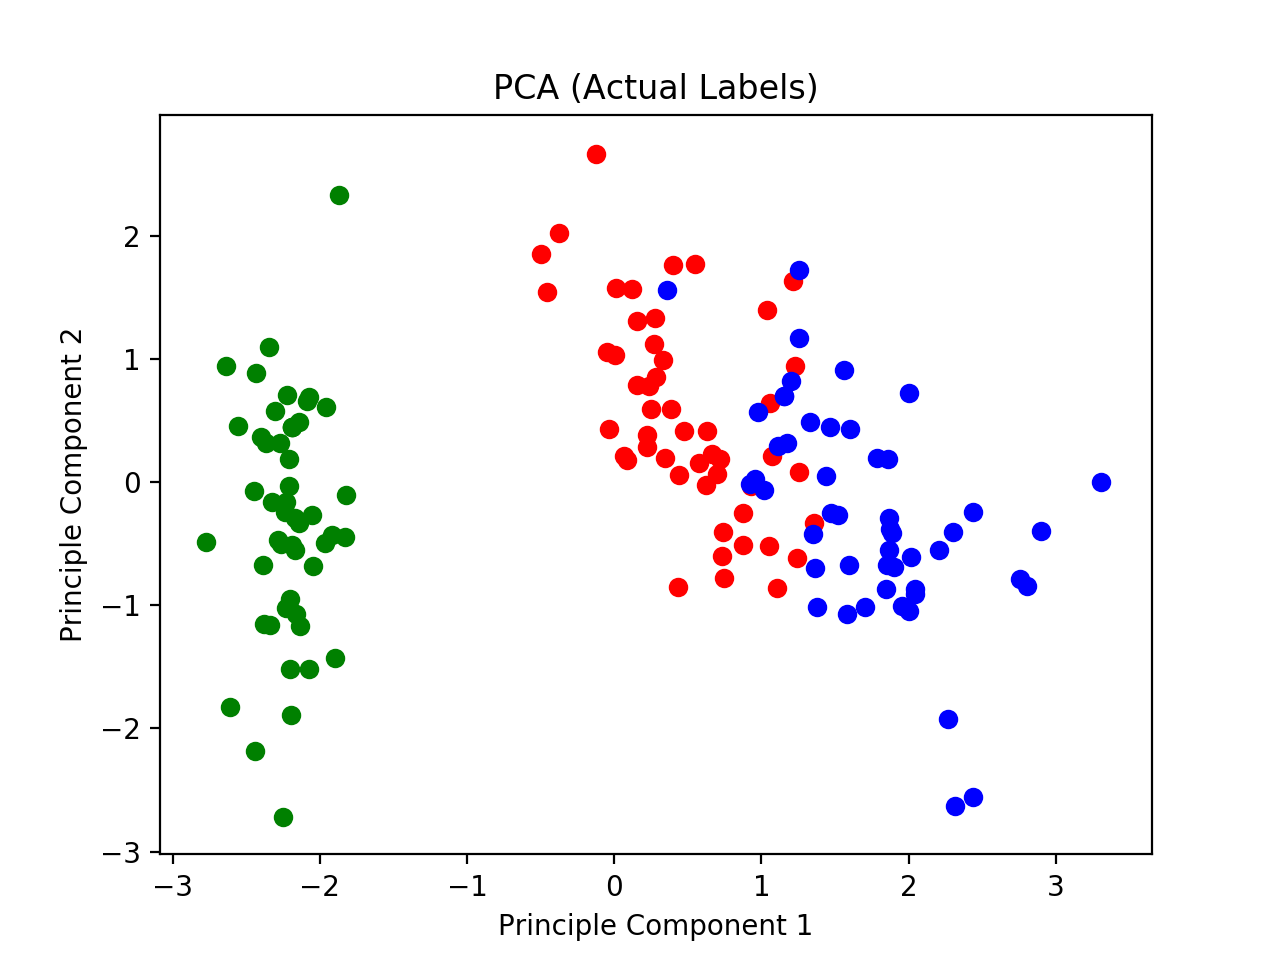

In [51]:
%matplotlib notebook
import matplotlib.pyplot as plt

pca = PCA(2)
pc = pca.fit(X)

variance_proportion = pca.variance_proportion()
print("Variance explained by principle components: %f" % variance_proportion)

colors = ['r', 'b', 'g']
for i, point in enumerate(pc):
    plt.scatter(point[0], point[1], color=colors[labels[i]])

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('PCA (Actual Labels)')
plt.show()

<IPython.core.display.Javascript object>


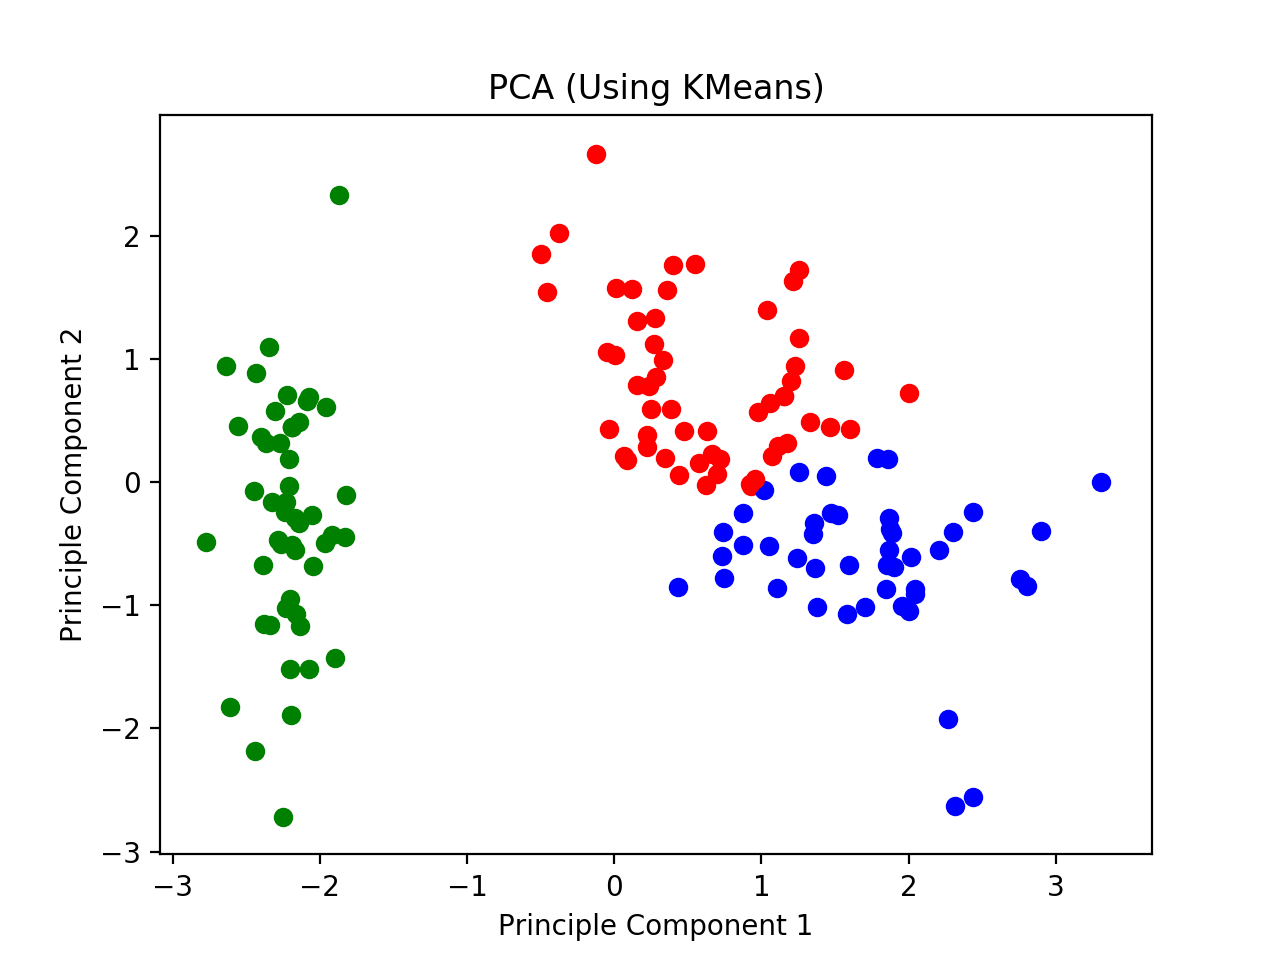

In [50]:
%matplotlib notebook

import sys
sys.path.append('../kmeans')

from kmeans.kmeans import KMeans

# Perform KMeans on the principle components.
kmeans = KMeans(number_of_clusters=3)
predictions = kmeans.fit(pc)

colors = ['r', 'b', 'g']
for i, point in enumerate(pc):
    plt.scatter(point[0], point[1], color=colors[predictions[i]])

plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('PCA (Using KMeans)')
plt.show()